### 1. Load libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
base_url = 'https://books.toscrape.com/'

In [7]:
# function to make a request to the website
def make_request(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:127.0) Gecko/20100101 Firefox/127.0'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.content  
    else:
        print(f"Failed to retrieve page. Status code: {response.status_code}")
        return None

####  Understanding Website Structure

In [ ]:
# response = requests.get("https://books.toscrape.com/")
# soup = BeautifulSoup(response.content)
# print(soup.prettify())

### 2. Data Collection and Exploration

#### Q1. What is the total number of books available on the website?

In [25]:
# function to get total number of books
def get_total_books():
    base_url = 'https://books.toscrape.com/'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:127.0) Gecko/20100101 Firefox/127.0'}
    response = requests.get(base_url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content)
        
        # extract the total number of books from the footer
        total_books_element = soup.find('strong')
        
        if total_books_element:
            total_books = total_books_element.text.strip()
            return total_books
        else:
            print("Could not find the total number of books element.")
            return None
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None

# Use Main function to run the task
def main():
    total_books = get_total_books()
    
    if total_books:
        print(f"Total number of books available: {total_books}")
    else:
        print("Error retrieving total number of books.")

if __name__ == "__main__":
    main()

Total number of books available: 1000


#### Q2. How many books are there in each category?

In [27]:
# function to get total number of books in a category
def get_books_in_category(category_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:127.0) Gecko/20100101 Firefox/127.0'}
    response = requests.get(category_url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content)
        
        # find all book containers
        books = soup.find_all('article', class_='product_pod')
        return len(books)
    else:
        print(f"Failed to retrieve the page for {category_url}. Status code: {response.status_code}")
        return None

# function to get book categories
def get_book_categories(base_url):
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content)
    
    categories = soup.find('ul', class_='nav nav-list').find_all('a')[1:]
    
    category_list = []
    for category in categories:
        category_name = category.text.strip()
        category_url = base_url + category['href']
        category_list.append({'name': category_name, 'url': category_url})
    
    return category_list

def main():
    base_url = 'https://books.toscrape.com/'
    
    # get book categories
    categories = get_book_categories(base_url)
    
    if categories:
        print("Number of books in each category:")
        for category in categories:
            category_name = category['name']
            category_url = category['url']
            num_books = get_books_in_category(category_url)
            if num_books is not None:
                print(f"{category_name}: {num_books}")
            else:
                print(f"Failed to retrieve book count for {category_name}")
    else:
        print("Failed to retrieve book categories.")

if __name__ == "__main__":
    main()

Number of books in each category:
Travel: 11
Mystery: 20
Historical Fiction: 20
Sequential Art: 20
Classics: 19
Philosophy: 11
Romance: 20
Womens Fiction: 17
Fiction: 20
Childrens: 20
Religion: 7
Nonfiction: 20
Music: 13
Default: 20
Science Fiction: 16
Sports and Games: 5
Add a comment: 20
Fantasy: 20
New Adult: 6
Young Adult: 20
Science: 14
Poetry: 19
Paranormal: 1
Art: 8
Psychology: 7
Autobiography: 9
Parenting: 1
Adult Fiction: 1
Humor: 10
Horror: 17
History: 18
Food and Drink: 20
Christian Fiction: 6
Business: 12
Biography: 5
Thriller: 11
Contemporary: 3
Spirituality: 6
Academic: 1
Self Help: 5
Historical: 2
Christian: 3
Suspense: 1
Short Stories: 1
Novels: 1
Health: 4
Politics: 3
Cultural: 1
Erotica: 1
Crime: 1


### 3. Data Analysis

#### Q3. What is the distribution of book ratings?

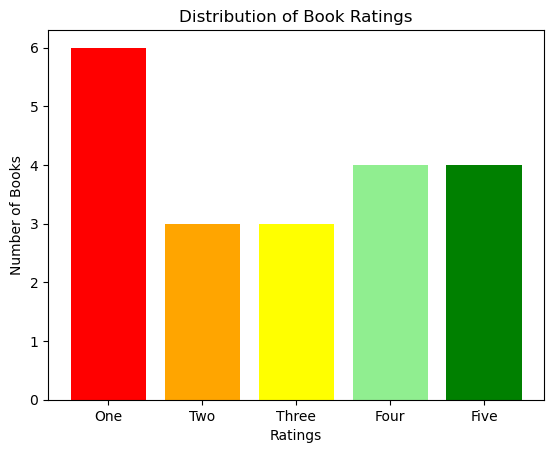

In [13]:
# function to fetch book URLs from the main page
def get_book_urls():
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:127.0) Gecko/20100101 Firefox/127.0'}
    response = requests.get(base_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # find all book links
    books = soup.find_all('article', class_='product_pod')
    book_urls = [base_url + book.find('h3').find('a')['href'] for book in books]
    
    return book_urls

# function to get book rating from detail page
def get_book_rating(book_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:127.0) Gecko/20100101 Firefox/127.0'}
    response = requests.get(book_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # find the rating value
    rating_tag = soup.find('p', class_='star-rating')
    if rating_tag:
        # extract the rating from class attribute
        rating = rating_tag['class'][1]
        return rating
    else:
        return None

# Main function to fetch ratings
def main():
    book_urls = get_book_urls()
    ratings = []
    
    # look through each book URL to fetch rating
    for url in book_urls:
        rating = get_book_rating(url)
        if rating:
            ratings.append(rating)
    
    # plot the distribution of ratings
    rating_counts = { 'One': 0, 'Two': 0, 'Three': 0, 'Four': 0, 'Five': 0 }
    for rating in ratings:
        rating_counts[rating] += 1
    
    # plot the distribution
    labels = rating_counts.keys()
    counts = rating_counts.values()
    plt.bar(labels, counts, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
    plt.xlabel('Ratings')
    plt.ylabel('Number of Books')
    plt.title('Distribution of Book Ratings')
    plt.show()

if __name__ == "__main__":
    main()

#### Q4. What are the top 10 highest-rated books and their prices?

In [22]:
# function to get top 10 highest-rated books and their prices
def get_top_10_books():
    # make request to the website
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:127.0) Gecko/20100101 Firefox/127.0'}
    response = requests.get(base_url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # create an empty list to store book details
        books = []
        
        # find all article elements
        articles = soup.find_all('article', class_='product_pod')
        
        for article in articles:
            # book title
            title = article.find('h3').a.attrs['title']
            
            # book rating
            rating = article.find('p', class_='star-rating').attrs['class'][1]
            
            # convert rating to numeric value
            rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
            numeric_rating = rating_map.get(rating)
            
            # book price
            price = article.find('p', class_='price_color').text.strip('Â£')
            
            # store book details
            books.append({'title': title, 'rating': numeric_rating, 'price': float(price)})
        
        # sort books by rating (highest to lowest)
        sorted_books = sorted(books, key=lambda x: x['rating'], reverse=True)
        
        # set up loops to print top 10 highest-rated books and their prices
        print("Top 10 Highest-Rated Books:")
        for i, book in enumerate(sorted_books[:10], start=1):
            print(f"{i}. Title: {book['title']}")
            print(f"   Rating: {book['rating']}")
            print(f"   Price: £{book['price']}")
            print()
    else:
        print(f"Failed to retrieve page. Status code: {response.status_code}")

if __name__ == "__main__":
    get_top_10_books()

Top 10 Highest-Rated Books:
1. Title: Sapiens: A Brief History of Humankind
   Rating: 5
   Price: £54.23

2. Title: Set Me Free
   Rating: 5
   Price: £17.46

3. Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
   Rating: 5
   Price: £52.29

4. Title: Rip it Up and Start Again
   Rating: 5
   Price: £35.02

5. Title: Sharp Objects
   Rating: 4
   Price: £47.82

6. Title: The Dirty Little Secrets of Getting Your Dream Job
   Rating: 4
   Price: £33.34

7. Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
   Rating: 4
   Price: £22.6

8. Title: Shakespeare's Sonnets
   Rating: 4
   Price: £20.66

9. Title: A Light in the Attic
   Rating: 3
   Price: £51.77

10. Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
   Rating: 3
   Price: £17.93



### 4. Visualization

#### Q5. Bar chart to show the number of books in each category

Category Counts: {'Travel': 11, 'Mystery': 20, 'Historical Fiction': 20, 'Sequential Art': 20, 'Classics': 19, 'Philosophy': 11, 'Romance': 20, 'Womens Fiction': 17, 'Fiction': 20, 'Childrens': 20, 'Religion': 7, 'Nonfiction': 20, 'Music': 13, 'Default': 20, 'Science Fiction': 16, 'Sports and Games': 5, 'Add a comment': 20, 'Fantasy': 20, 'New Adult': 6, 'Young Adult': 20, 'Science': 14, 'Poetry': 19, 'Paranormal': 1, 'Art': 8, 'Psychology': 7, 'Autobiography': 9, 'Parenting': 1, 'Adult Fiction': 1, 'Humor': 10, 'Horror': 17, 'History': 18, 'Food and Drink': 20, 'Christian Fiction': 6, 'Business': 12, 'Biography': 5, 'Thriller': 11, 'Contemporary': 3, 'Spirituality': 6, 'Academic': 1, 'Self Help': 5, 'Historical': 2, 'Christian': 3, 'Suspense': 1, 'Short Stories': 1, 'Novels': 1, 'Health': 4, 'Politics': 3, 'Cultural': 1, 'Erotica': 1, 'Crime': 1}


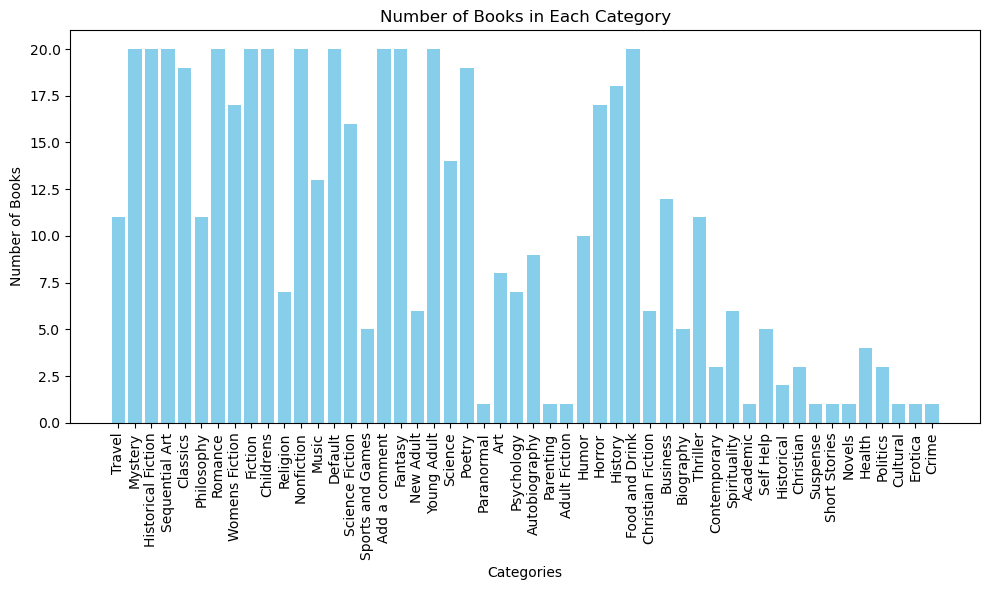

In [14]:
# function to get book categories and counts
def get_book_categories_and_counts():
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # find all category links
    categories = soup.find('ul', class_='nav-list').find_all('a')[1:]
    category_dict = {}
    
    for category in categories:
        category_name = category.text.strip()
        category_url = base_url + category['href']
        
        # count the number of books in each category
        category_response = requests.get(category_url)
        category_soup = BeautifulSoup(category_response.content, 'html.parser')
        num_books = len(category_soup.find_all('article', class_='product_pod'))
        
        category_dict[category_name] = num_books
    
    return category_dict

# function to create bar chart
def create_bar_chart(category_counts):
    categories = list(category_counts.keys())
    book_counts = list(category_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, book_counts, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Number of Books')
    plt.title('Number of Books in Each Category')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def main():
    category_counts = get_book_categories_and_counts()
    print("Category Counts:", category_counts)
    
    create_bar_chart(category_counts)

if __name__ == "__main__":
    main()

#### Q6. Histogram showing the distribution of book prices

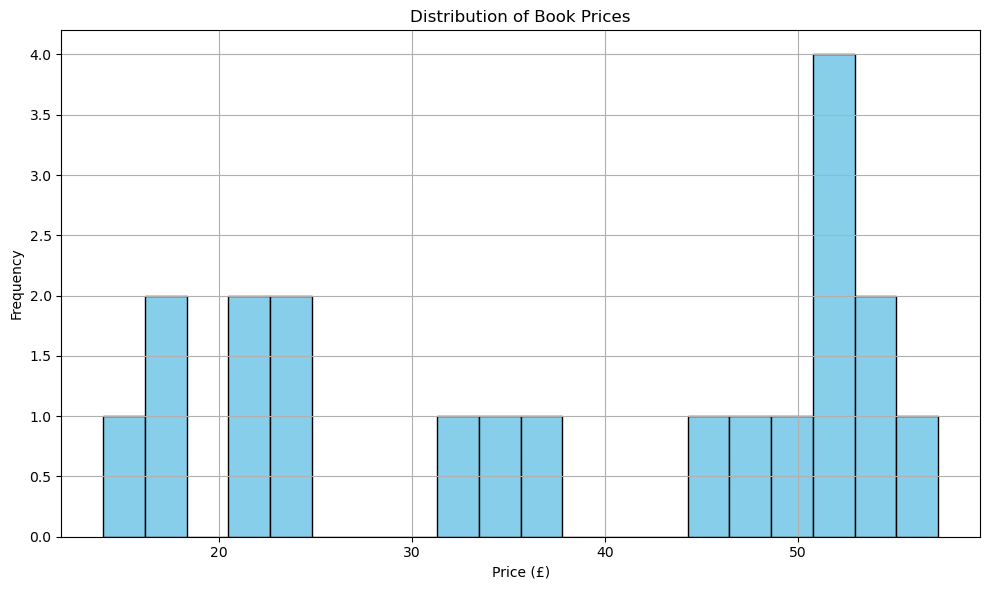

In [15]:
# function to get book data including prices
def get_book_data():
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    books = soup.find_all('article', class_='product_pod')
    book_prices = []
    
    for book in books:
        price = book.find('p', class_='price_color').text.strip('£')
        book_prices.append(float(price))
    
    return book_prices

# function to create histogram
def create_price_histogram(book_prices):
    plt.figure(figsize=(10, 6))
    plt.hist(book_prices, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Price (£)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Book Prices')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    book_prices = get_book_data()
    create_price_histogram(book_prices)

if __name__ == "__main__":
    main()

#### Q7. Scatter plot showing the relationship between book prices and ratings

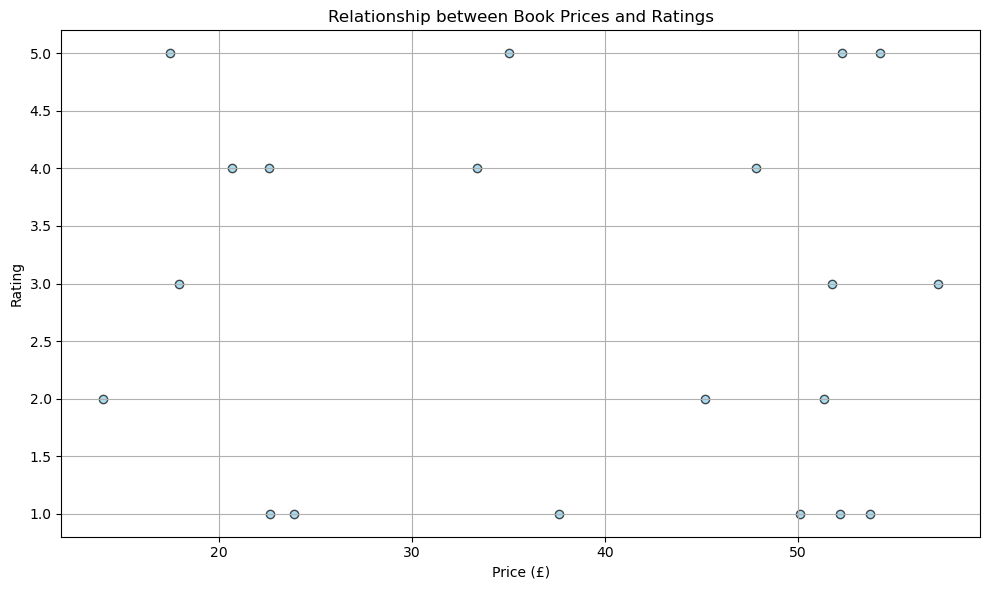

In [16]:
# function to get book data including prices and ratings
def get_book_data():
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    books = soup.find_all('article', class_='product_pod')
    book_prices = []
    book_ratings = []
    
    for book in books:
        price = book.find('p', class_='price_color').text.strip('£')
        book_prices.append(float(price))
        
        rating = book.find('p', class_='star-rating')['class'][1]
        # Convert star rating to numeric value
        rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
        book_ratings.append(rating_map[rating])
    
    return book_prices, book_ratings

# function to create scatter plot
def create_price_rating_scatter(book_prices, book_ratings):
    plt.figure(figsize=(10, 6))
    plt.scatter(book_prices, book_ratings, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Price (£)')
    plt.ylabel('Rating')
    plt.title('Relationship between Book Prices and Ratings')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    book_prices, book_ratings = get_book_data()
    create_price_rating_scatter(book_prices, book_ratings)

if __name__ == "__main__":
    main()

#### Q8. Save book categories to CSV

In [24]:
# function to save data to CSV file
def save_to_csv(data, filename):
    if data:
        keys = data[0].keys()  # Assuming all dictionaries have the same keys
        with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=keys)
            writer.writeheader()
            writer.writerows(data)
        print(f"Data saved successfully to {filename}")
    else:
        print("No data to save.")

def main():
    base_url = 'https://books.toscrape.com/'
    
    # Get total number of books (without printing)
    total_books = get_total_books(base_url)
    
    # Get book categories (without printing)
    categories = get_book_categories(base_url)
    
    # Save data to CSV file
    data_to_save = categories  # Example: saving categories
    save_to_csv(data_to_save, 'book_categories.csv')

if __name__ == "__main__":
    main()

Data saved successfully to book_categories.csv
